<a href="https://colab.research.google.com/github/Derrick-Majani/Cofee_Quality/blob/main/Coffee_Quality_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Business Context
Coffee roasting is the process of turning green coffee beans into brown ones. Brown coffee beans can be made in a variety of methods, which also influences the flavor of the end product. A roasting instrument is basically a convection oven. It is a mechanism of inflicting heat energy into the raw product which makes the product consumable. And the price of coffee is heavily influenced by the quality of the beans after roasting. As a result, the cost can be determined depending on the quality of the beans after roasting.

The rising automation in the manufacturing business necessitates the automation of quality inspection of output products with minimal human intervention. Quality inspectors in businesses examine product quality after it is manufactured to ensure that it meets industry standards.

Each product's quality inspection is a time-consuming manual process, and a low-quality product wastes upstream factory capacity, consumables, labor, and money. With the emerging AI trend, companies are looking to leverage machine learning-based technologies to automate material quality inspection during the manufacturing process to reduce human intervention while achieving human-level or better accuracy.

## Objective
A roasting corporation named "KC Roasters" has engaged you to predict the quality of a roasting instrument's outputs, which will be used to determine the price of coffee beans. The quality value ranges from 0 to 100 with 0 being the worst and 100 being the best. and the higher the quality of the beans, the higher the price.

The coffee roasting instrument used by Roasters is divided into five equal-sized compartments, each with three temperature sensors. 3 sensors have been installed at 3 different locations to be able to capture temperature at different locations inside the chamber. Additionally, the height of raw material (volume entering the chamber) and relative humidity of roasted material is provided

The data shared consists of 17 predictor variables and a continuous target variable, and the aim is to build a Regression model which can accurately predict the quality of the product. After finding out the quality, the company can decide the cost of beans effectively.

Data Dictionary
- T_data_1_1 - Temperature recorded by 1st sensor in the 1st chamber in Fahrenheit
- T_data_1_2 - Temperature recorded by 2nd sensor in the 1st chamber in Fahrenheit
- T_data_1_3 - Temperature recorded by 3rd sensor in the 1st chamber in Fahrenheit
- T_data_2_1 - Temperature recorded by 1st sensor in the 2nd chamber in Fahrenheit
- T_data_2_2 - Temperature recorded by 2nd sensor in the 2nd chamber in Fahrenheit
- T_data_2_3 - Temperature recorded by 3rd sensor in the 2nd chamber in Fahrenheit
- T_data_3_1 - Temperature recorded by 1st sensor in the 3rd chamber in Fahrenheit
- T_data_3_2 - Temperature recorded by 2nd sensor in the 3rd chamber in Fahrenheit
- T_data_3_3 - Temperature recorded by 3rd sensor in the 3rd chamber in Fahrenheit
- T_data_4_1 - Temperature recorded by 1st sensor in the 4th chamber in Fahrenheit
- T_data_4_2 - Temperature recorded by 2nd sensor in the 4th chamber in Fahrenheit
- T_data_4_3 - Temperature recorded by 3rd sensor in the 4th chamber in Fahrenheit
- T_data_5_1 - Temperature recorded by 1st sensor in the 5th chamber in Fahrenheit
- T_data_5_2 - Temperature recorded by 2nd sensor in the 5th chamber in Fahrenheit
- T_data_5_3 - Temperature recorded by 3rd sensor in the 5th chamber in Fahrenheit
- H_data - Height of Raw material layer, basically represents the volume of raw material going inside the chamber in pounds.
- AH_data - Roasted Coffee beans relative humidity.
- quality - Quality of the beans

## Import Libraries and Data

In [26]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import io
import os
import sys
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split

In [2]:
# Use Local drives to upload the csv on google colab
from google.colab import files
uploaded = files.upload()

Saving Data (1).csv to Data (1).csv


In [28]:
data =pd.read_csv(io.BytesIO(uploaded['Data (1).csv']))
data.sample(n=5)

,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data,quality
6739,276,271,281,373,381,397,470,446,437,378,373,375,260,266,267,156.39,7.69,84
11001,269,275,280,388,376,382,524,517,513,371,376,379,220,244,247,150.70,6.89,71
13616,261,254,258,321,350,345,467,486,485,365,368,666,246,253,270,169.56,7.69,43
11164,237,235,233,366,361,352,508,518,519,358,361,380,288,243,252,153.93,6.83,54
22496,227,218,227,344,338,343,469,446,464,291,314,322,242,208,271,182.75,6.86,48


In [29]:
data.shape

(29131, 18)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29131 entries, 0 to 29130
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   T_data_1_1  29131 non-null  int64  
 1   T_data_1_2  29131 non-null  int64  
 2   T_data_1_3  29131 non-null  int64  
 3   T_data_2_1  29131 non-null  int64  
 4   T_data_2_2  29131 non-null  int64  
 5   T_data_2_3  29131 non-null  int64  
 6   T_data_3_1  29131 non-null  int64  
 7   T_data_3_2  29131 non-null  int64  
 8   T_data_3_3  29131 non-null  int64  
 9   T_data_4_1  29131 non-null  int64  
 10  T_data_4_2  29131 non-null  int64  
 11  T_data_4_3  29131 non-null  int64  
 12  T_data_5_1  29131 non-null  int64  
 13  T_data_5_2  29131 non-null  int64  
 14  T_data_5_3  29131 non-null  int64  
 15  H_data      29087 non-null  float64
 16  AH_data     29100 non-null  float64
 17  quality     29131 non-null  int64  
dtypes: float64(2), int64(16)
memory usage: 4.0 MB


## Statistical Summary

In [31]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
T_data_1_1,29131.0,253.552058,32.487764,13.00,232.00,252.00,280.000,343.00
T_data_1_2,29131.0,254.078061,30.024924,168.00,231.00,254.00,280.000,341.00
T_data_1_3,29131.0,254.057636,28.977460,183.00,232.00,252.00,279.000,339.00
T_data_2_1,29131.0,343.075796,32.543595,70.00,325.00,344.00,363.000,436.00
T_data_2_2,29131.0,344.523669,33.718698,113.00,326.00,344.00,364.000,598.00
T_data_2_3,29131.0,342.017335,31.030835,107.00,322.50,343.00,363.000,433.00
T_data_3_1,29131.0,494.513371,50.315054,311.00,461.00,497.00,524.000,1024.00
T_data_3_2,29131.0,495.851155,43.755845,401.00,460.00,498.00,527.000,756.00
T_data_3_3,29131.0,500.774776,64.995545,197.00,460.00,499.00,530.000,934.00
T_data_4_1,29131.0,345.080979,43.405324,53.00,324.00,343.00,362.000,912.00


## Missing Values

In [32]:
def missing_check(data):
    total = data.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(data)

,Total,Percent
H_data,44,0.001510
AH_data,31,0.001064
T_data_1_1,0,0.000000
T_data_1_2,0,0.000000
T_data_5_3,0,0.000000
T_data_5_2,0,0.000000
T_data_5_1,0,0.000000
T_data_4_3,0,0.000000
T_data_4_2,0,0.000000
T_data_4_1,0,0.000000


In [33]:
data.loc[(data['AH_data'].isnull()) |
         (data['H_data'].isnull())]

,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data,quality
20,214,214,211,327,338,344,495,473,485,384,352,351,248,241,240,NaN,9.22,77
21,214,214,211,326,338,344,496,473,485,385,353,351,248,241,240,NaN,9.22,82
22,214,214,211,326,337,344,497,473,485,385,353,351,248,241,240,NaN,9.22,86
23,214,214,211,325,336,344,498,473,485,386,353,351,248,241,240,NaN,9.22,91
24,214,214,211,324,335,344,499,473,486,386,353,351,248,241,240,NaN,9.22,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,237,245,255,337,302,345,421,488,485,338,351,355,240,243,239,NaN,7.02,77
289,237,245,255,335,313,345,421,488,485,339,348,354,239,244,239,NaN,7.02,73
291,237,246,255,335,316,346,421,488,485,339,347,354,239,244,239,NaN,7.02,79
299,238,247,255,335,329,348,422,486,486,340,342,353,238,246,240,NaN,7.02,73


In [34]:
#ceating the copy of the dataframe
df = data.copy()

## Univariate Analysis

In [35]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="white"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

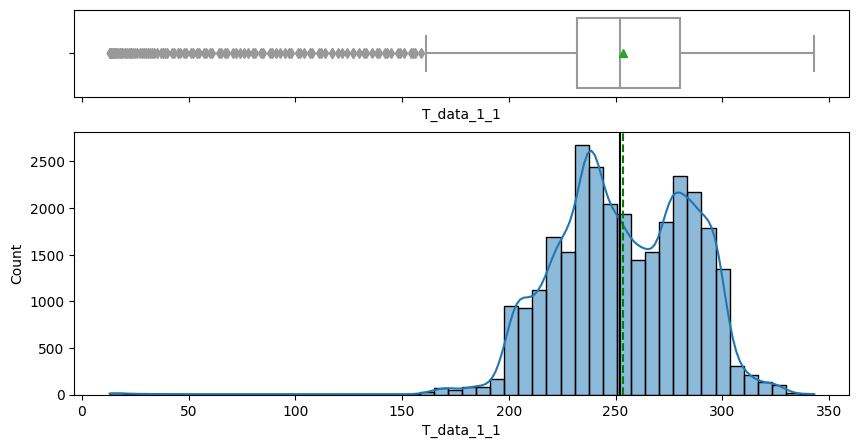

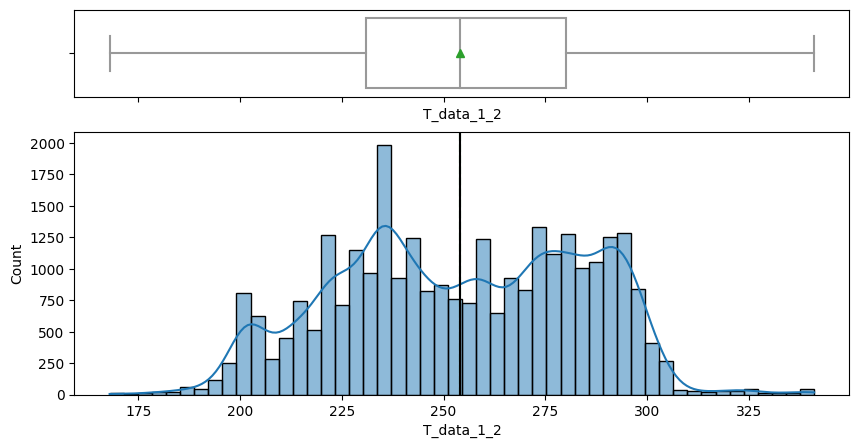

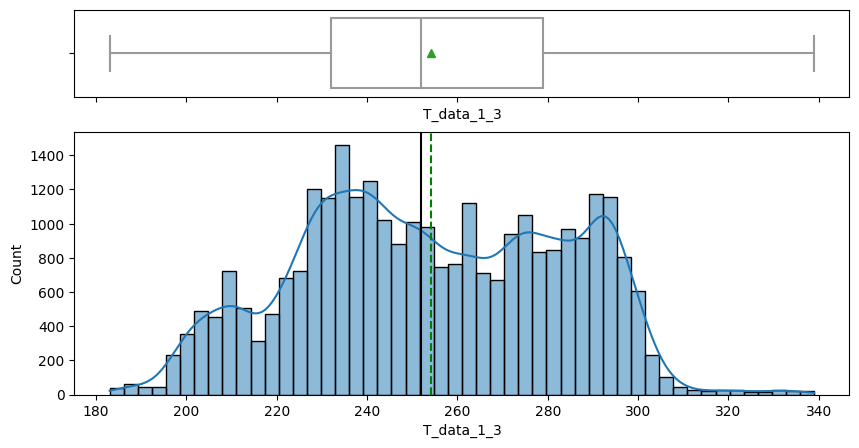

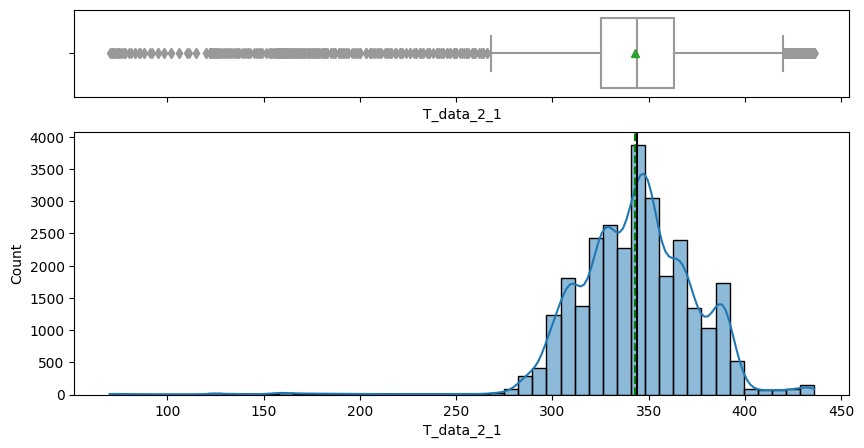

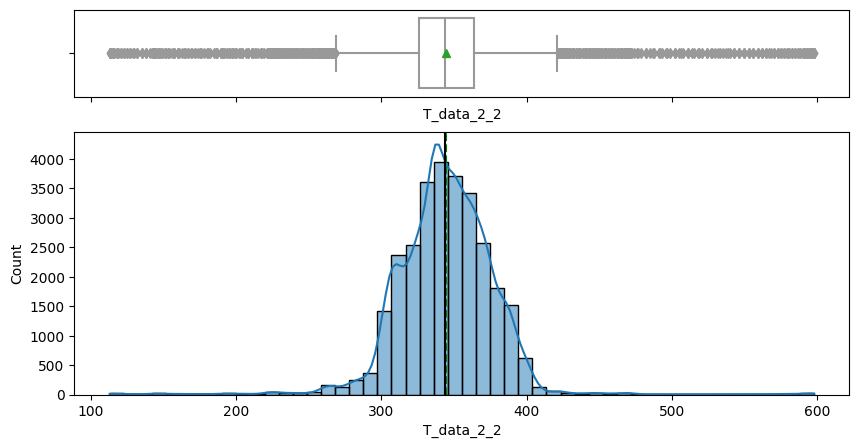

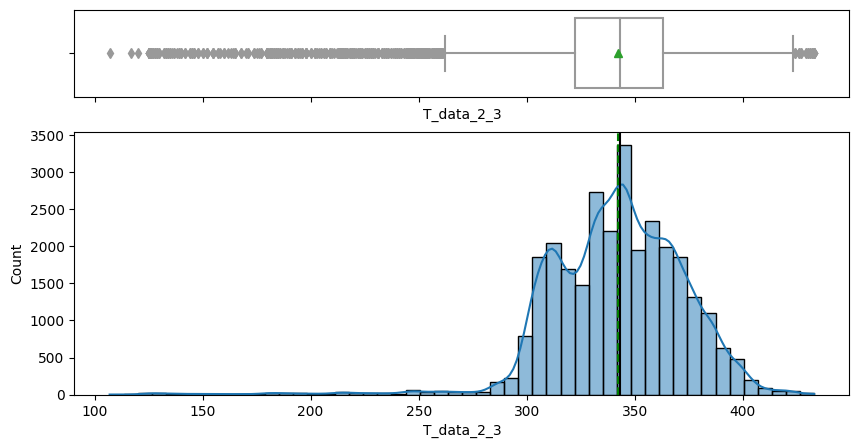

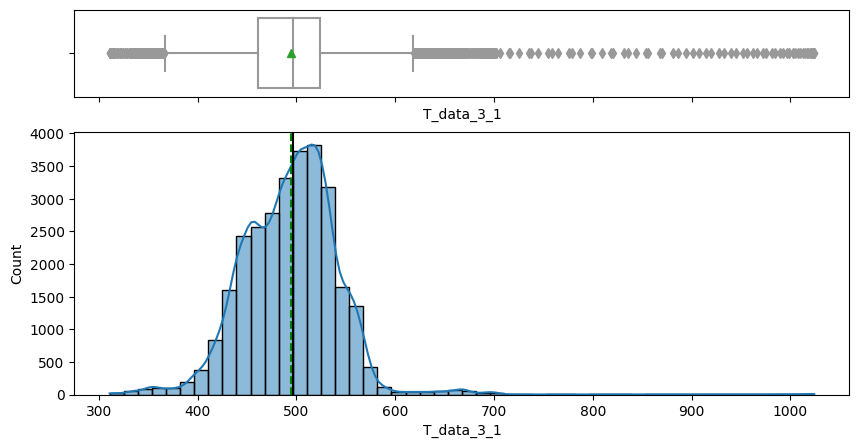

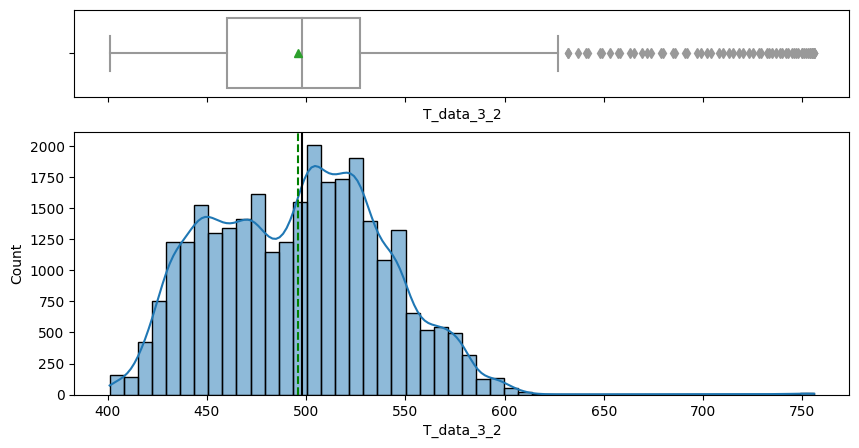

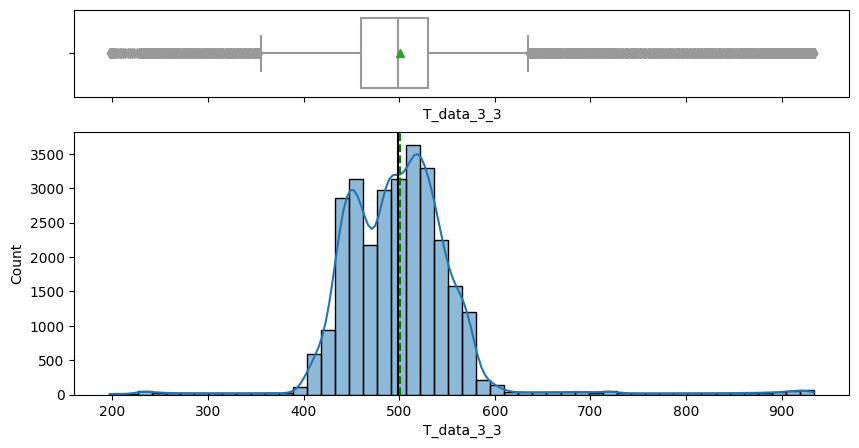

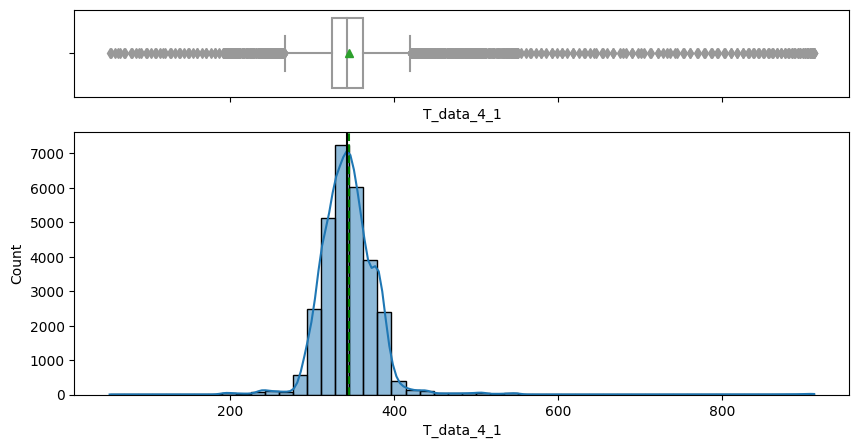

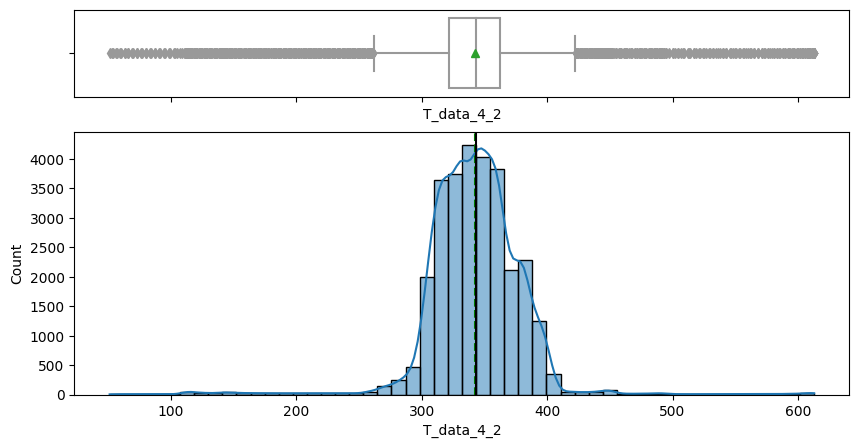

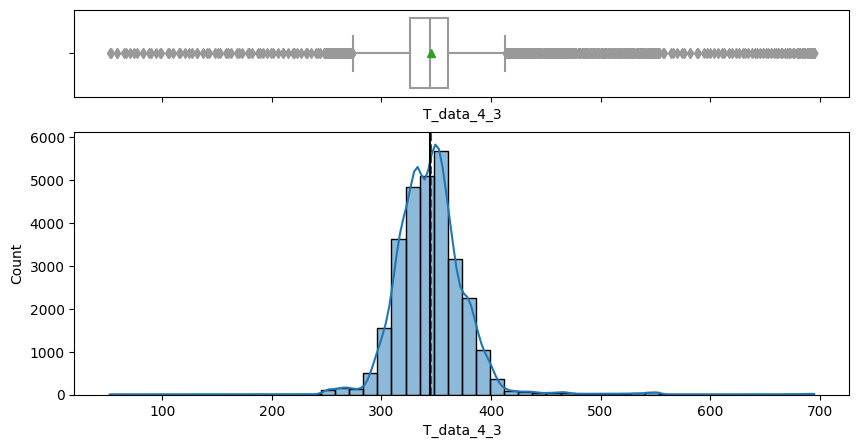

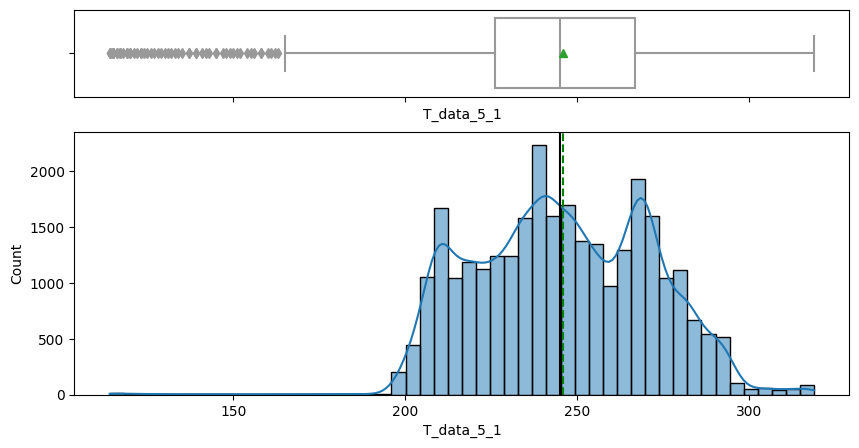

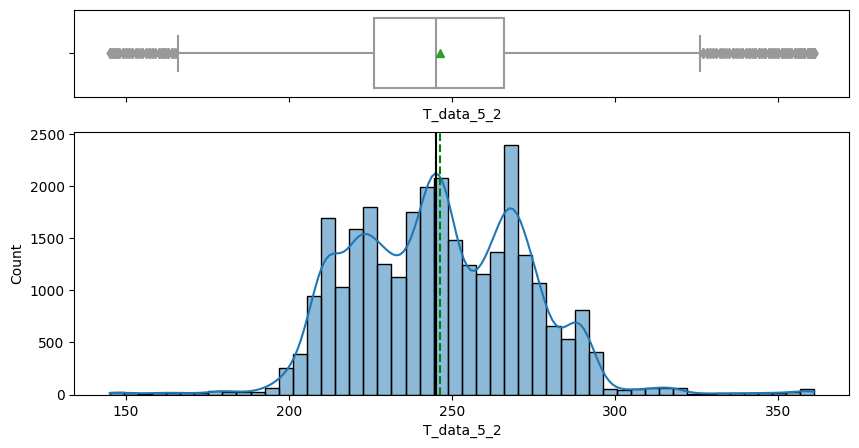

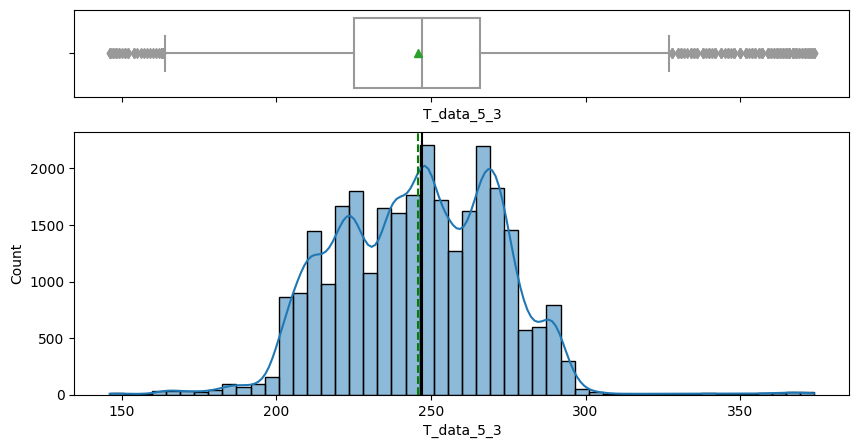

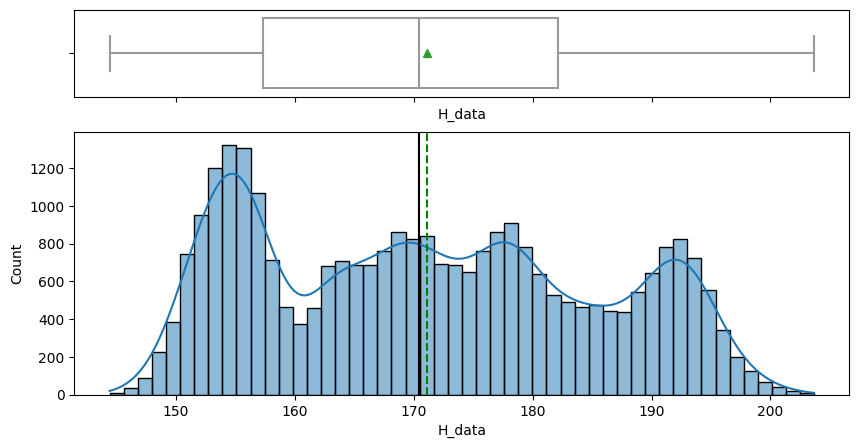

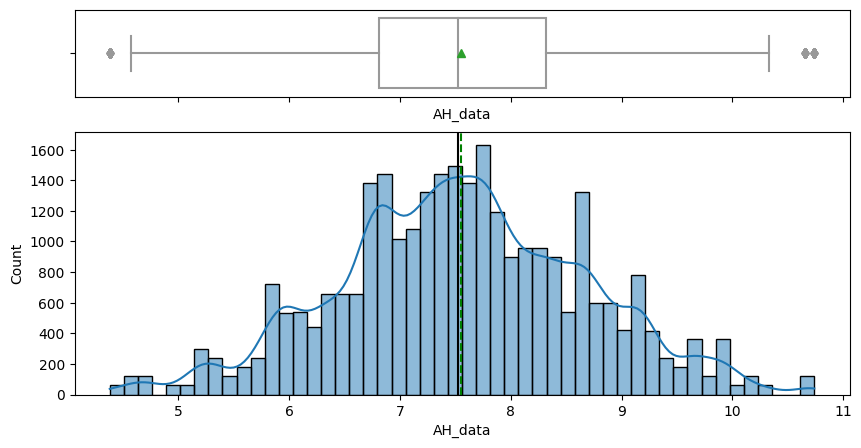

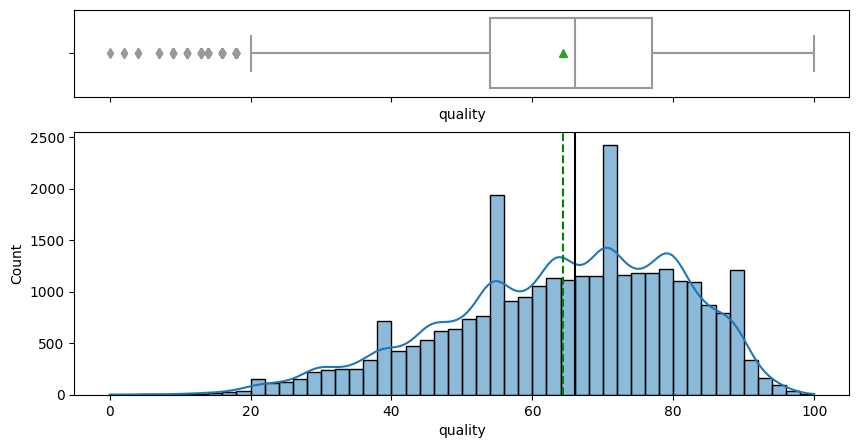

In [36]:
# selecting numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

for item in num_cols:
    histogram_boxplot(df, item, bins=50, kde=True, figsize=(10, 5))

## Bivariate Analysis

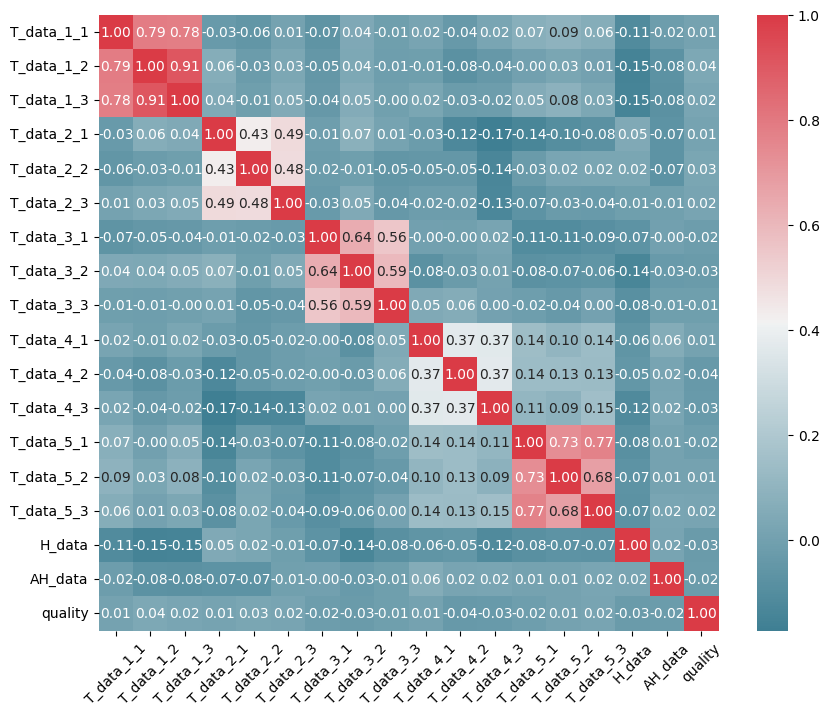

In [37]:
# Select only numerical columns
num_cols = df.select_dtypes(include=['float64', 'int64'])

# Create a correlation matrix
corr_matrix = num_cols.corr()

# Plot the correlation matrix
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the figure size as per your preference

cmap = sns.diverging_palette(220, 10, as_cmap=True)  # Define a custom color palette
sns.heatmap(corr_matrix, cmap=cmap, annot=True, fmt='.2f', ax=ax, annot_kws={"fontsize": 10})  # Increase the font size of annotations

# Rotate the x-axis tick labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


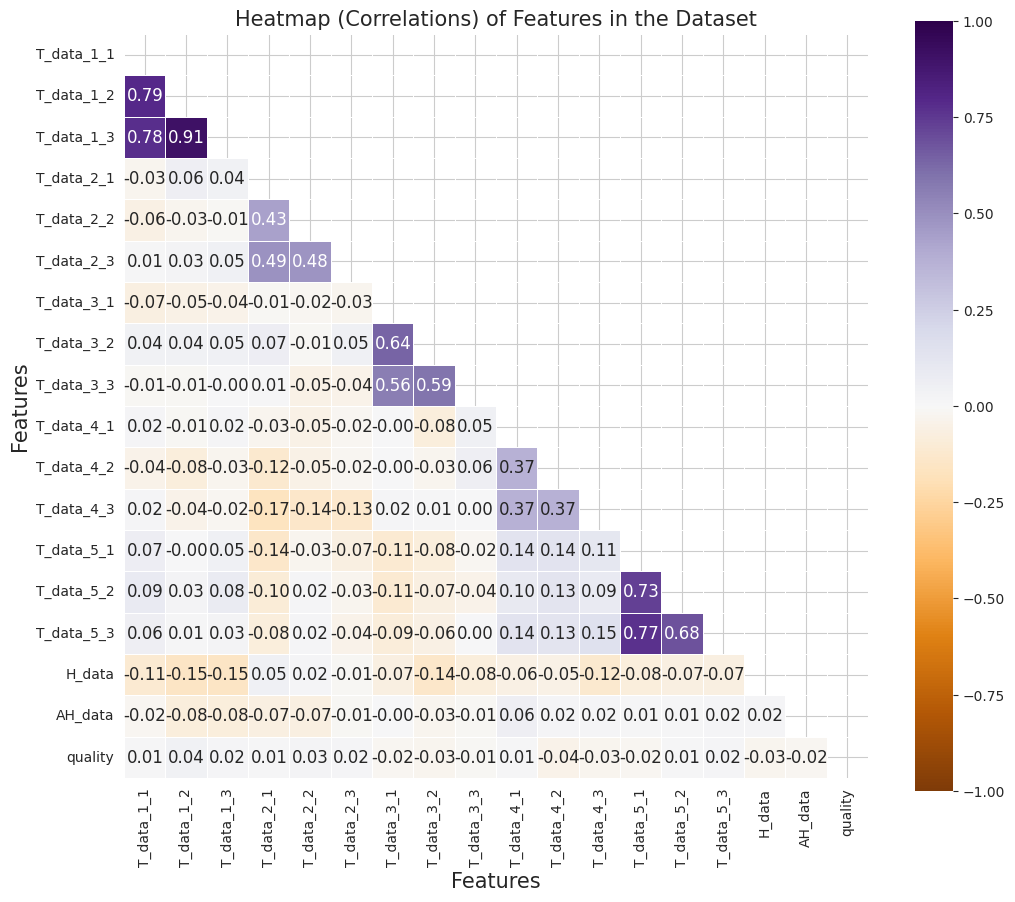

In [38]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix for the dataset
dataset_corr = df.corr().round(2)

# Create a mask for the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(dataset_corr, dtype=bool))

# Generate the correlation matrix heatmap using Seaborn
with sns.axes_style("whitegrid"):
    f, ax = plt.subplots(figsize=(12, 10))
    sns.heatmap(dataset_corr, mask=mask, vmax=1, center=0, vmin=-1, square=True, cmap='PuOr', linewidths=.5, annot=True, annot_kws={"size": 12}, fmt='.2f')
    plt.title('Heatmap (Correlations) of Features in the Dataset', fontsize=15)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Features', fontsize=15)
plt.show()


## Data Pre-Processing

In [39]:
# Separating features and the target column
X = df.drop("quality", axis=1)  # Drop the specified column
y = df["quality"]


In [40]:
from sklearn.model_selection import train_test_split

# Split data into training and remaining data (validation + testing)
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.4, random_state=42)

# Split remaining data into validation and testing
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)

# Print the sizes of each split
print("Training set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])
print("Testing set size:", X_test.shape[0])


Training set size: 17478
Validation set size: 5826
Testing set size: 5827


## Missing Value Imputation

In [41]:
import numpy as np
from sklearn.impute import KNNImputer

# Create an instance of KNNImputer with neighbors=5
imputer = KNNImputer(n_neighbors=5)

# Perform missing value imputation on X_train
X_train = imputer.fit_transform(X_train)

# Perform missing value imputation on X_val and X_test
X_val = imputer.transform(X_val)
X_test = imputer.transform(X_test)

# Print the imputed datasets
print("X_train after imputation:")
print(np.isnan(X_train))

print("X_val after imputation:")
print(np.isnan(X_val))

print("X_test after imputation:")
print(np.isnan(X_test))


X_train after imputation:
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
X_val after imputation:
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
X_test after imputation:
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


## Decision Tree

In [42]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create the Decision Tree model
decision_tree = DecisionTreeRegressor()

# Train the model
decision_tree.fit(X_train, y_train)

# Make predictions on training and validation data
y_train_pred = decision_tree.predict(X_train)
y_val_pred = decision_tree.predict(X_val)

# Evaluate the model
train_rmse_dt = mean_squared_error(y_train, y_train_pred, squared=False)
val_rmse_dt = mean_squared_error(y_val, y_val_pred, squared=False)

train_mae_dt = mean_absolute_error(y_train, y_train_pred)
val_mae_dt = mean_absolute_error(y_val, y_val_pred)

train_r2_dt = r2_score(y_train, y_train_pred)
val_r2_dt = r2_score(y_val, y_val_pred)

# Print evaluation metrics
print("Training RMSE:", train_rmse_dt)
print("Validation RMSE:", val_rmse_dt)
print("Training MAE:", train_mae_dt)
print("Validation MAE:", val_mae_dt)
print("Training R^2 Score:", train_r2_dt)
print("Validation R^2 Score:", val_r2_dt)


Training RMSE: 0.0
Validation RMSE: 7.504524324803822
Training MAE: 0.0
Validation MAE: 5.204600068657741
Training R^2 Score: 1.0
Validation R^2 Score: 0.7832649352452628


Training RMSE: 0.0

The root mean squared error (RMSE) measures the average difference between the predicted and actual values in the training data. A value of 0.0 indicates that the model perfectly predicts the training data, which suggests that the model has likely overfit the training data.
Validation RMSE: 7.496011068762777

The RMSE for the validation data measures the average difference between the predicted and actual values in the validation set. A value of 7.496 indicates that, on average, the predictions are off by approximately 7.5 units from the actual values in the validation set.
Training MAE: 0.0

The mean absolute error (MAE) measures the average absolute difference between the predicted and actual values in the training data. A value of 0.0 indicates that the model perfectly predicts the training data.
Validation MAE: 5.205629934775146

The MAE for the validation data measures the average absolute difference between the predicted and actual values in the validation set. A value of 5.206 indicates that, on average, the predictions are off by approximately 5.2 units from the actual values in the validation set.
Training R^2 Score: 1.0

The R^2 score (coefficient of determination) represents the proportion of the variance in the target variable that is predictable from the input features. A value of 1.0 indicates a perfect fit to the training data, suggesting that the model explains all the variance in the training data.
Validation R^2 Score: 0.7837563919856578

The R^2 score for the validation data measures how well the model generalizes to unseen data. A value of 0.784 indicates that the model explains approximately 78.4% of the variance in the validation data, suggesting a reasonably good fit.

## Random Forest

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create the Random Forest model
random_forest = RandomForestRegressor()

# Train the model
random_forest.fit(X_train, y_train)

# Make predictions on training and validation data
y_train_pred = random_forest.predict(X_train)
y_val_pred = random_forest.predict(X_val)

# Evaluate the model
train_rmse_rf = mean_squared_error(y_train, y_train_pred, squared=False)
val_rmse_rf = mean_squared_error(y_val, y_val_pred, squared=False)

train_mae_rf = mean_absolute_error(y_train, y_train_pred)
val_mae_rf = mean_absolute_error(y_val, y_val_pred)

train_r2_rf = r2_score(y_train, y_train_pred)
val_r2_rf = r2_score(y_val, y_val_pred)

# Print evaluation metrics
print("Training RMSE:", train_rmse_rf)
print("Validation RMSE:", val_rmse_rf)
print("Training MAE:", train_mae_rf)
print("Validation MAE:", val_mae_rf)
print("Training R^2 Score:", train_r2_rf)
print("Validation R^2 Score:", val_r2_rf)


Training RMSE: 2.024094065421224
Validation RMSE: 5.313143692551517
Training MAE: 1.5043282984323147
Validation MAE: 3.9642310332990047
Training R^2 Score: 0.9848060882767459
Validation R^2 Score: 0.8913609489370294


## Ada- Boost

In [44]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create the AdaBoost model
adaboost = AdaBoostRegressor()

# Train the model
adaboost.fit(X_train, y_train)

# Make predictions on training and validation data
y_train_pred = adaboost.predict(X_train)
y_val_pred = adaboost.predict(X_val)

# Evaluate the model
train_rmse_ab = mean_squared_error(y_train, y_train_pred, squared=False)
val_rmse_ab = mean_squared_error(y_val, y_val_pred, squared=False)

train_mae_ab = mean_absolute_error(y_train, y_train_pred)
val_mae_ab = mean_absolute_error(y_val, y_val_pred)

train_r2_ab = r2_score(y_train, y_train_pred)
val_r2_ab = r2_score(y_val, y_val_pred)

# Print evaluation metrics
print("Training RMSE:", train_rmse_ab)
print("Validation RMSE:", val_rmse_ab)
print("Training MAE:", train_mae_ab)
print("Validation MAE:", val_mae_ab)
print("Training R^2 Score:", train_r2_ab)
print("Validation R^2 Score:", val_r2_ab)


Training RMSE: 16.34242401415175
Validation RMSE: 16.13871672255273
Training MAE: 13.589257537780325
Validation MAE: 13.350881051407132
Training R^2 Score: 0.00953036820784603
Validation R^2 Score: -0.0023533307993466313


## XGBoost

In [45]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create the XGBoost model
xgboost = XGBRegressor()

# Train the model
xgboost.fit(X_train, y_train)

# Make predictions on training and validation data
y_train_pred = xgboost.predict(X_train)
y_val_pred = xgboost.predict(X_val)

# Evaluate the model
train_rmse_xgb = mean_squared_error(y_train, y_train_pred, squared=False)
val_rmse_xgb = mean_squared_error(y_val, y_val_pred, squared=False)

train_mae_xgb = mean_absolute_error(y_train, y_train_pred)
val_mae_xgb = mean_absolute_error(y_val, y_val_pred)

train_r2_xgb = r2_score(y_train, y_train_pred)
val_r2_xgb = r2_score(y_val, y_val_pred)

# Print evaluation metrics
print("Training RMSE:", train_rmse_xgb)
print("Validation RMSE:", val_rmse_xgb)
print("Training MAE:", train_mae_xgb)
print("Validation MAE:", val_mae_xgb)
print("Training R^2 Score:", train_r2_xgb)
print("Validation R^2 Score:", val_r2_xgb)


Training RMSE: 7.879860390484485
Validation RMSE: 9.292096169355862
Training MAE: 6.182592054324068
Validation MAE: 7.325439899351602
Training R^2 Score: 0.7697258107870069
Validation R^2 Score: 0.6677153859043181


## Comparison of Models

In [46]:
import pandas as pd

# Create a list of models and their performance metrics
models = ['Decision Tree', 'Random Forest', 'AdaBoost', 'XGBoost']
train_rmse = [train_rmse_dt, train_rmse_rf, train_rmse_ab, train_rmse_xgb]
val_rmse = [val_rmse_dt, val_rmse_rf, val_rmse_ab, val_rmse_xgb]
train_mae = [train_mae_dt, train_mae_rf, train_mae_ab, train_mae_xgb]
val_mae = [val_mae_dt, val_mae_rf, val_mae_ab, val_mae_xgb]
train_r2 = [train_r2_dt, train_r2_rf, train_r2_ab, train_r2_xgb]
val_r2 = [val_r2_dt, val_r2_rf, val_r2_ab, val_r2_xgb]

# Create a dictionary with the data
data = {
    'Training RMSE': train_rmse,
    'Validation RMSE': val_rmse,
    'Training MAE': train_mae,
    'Validation MAE': val_mae,
    'Training R^2 Score': train_r2,
    'Validation R^2 Score': val_r2
}

# Create the summary dataframe
summary_df = pd.DataFrame(data, index=models)

# Print the summary dataframe
summary_df


,Training RMSE,Validation RMSE,Training MAE,Validation MAE,Training R^2 Score,Validation R^2 Score
Decision Tree,0.000000,7.504524,0.000000,5.204600,1.000000,0.783265
Random Forest,2.024094,5.313144,1.504328,3.964231,0.984806,0.891361
AdaBoost,16.342424,16.138717,13.589258,13.350881,0.009530,-0.002353
XGBoost,7.879860,9.292096,6.182592,7.325440,0.769726,0.667715


## Hyper- Parameter TUning

### Decision Tree

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree model
decision_tree = DecisionTreeRegressor()

# Grid of parameters to choose from
parameters = {
    'max_depth': list(range(15, 21)) + [None],
    'min_samples_leaf': [1, 3] + [None],
    'max_leaf_nodes': [5, 10, 15] + [None],
    'min_impurity_decrease': [0.001, 0.0]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(decision_tree, parameters, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'max_depth': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1}
Best Score: 0.7193164885497042


In [48]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create the Decision Tree model with the specified parameters
decision_tree = DecisionTreeRegressor(max_depth=None, max_leaf_nodes=None,
                                      min_impurity_decrease=0, min_samples_leaf=1)

# Train the model
decision_tree.fit(X_train, y_train)

# Make predictions on training and validation data
y_train_pred = decision_tree.predict(X_train)
y_val_pred = decision_tree.predict(X_val)

# Evaluate the model
train_rmse_dtn = mean_squared_error(y_train, y_train_pred, squared=False)
val_rmse_dtn = mean_squared_error(y_val, y_val_pred, squared=False)

train_mae_dtn = mean_absolute_error(y_train, y_train_pred)
val_mae_dtn = mean_absolute_error(y_val, y_val_pred)

train_r2_dtn = r2_score(y_train, y_train_pred)
val_r2_dtn = r2_score(y_val, y_val_pred)

# Print evaluation metrics
print("Training RMSE:", train_rmse_dtn)
print("Validation RMSE:", val_rmse_dtn)
print("Training MAE:", train_mae_dtn)
print("Validation MAE:", val_mae_dtn)
print("Training R^2 Score:", train_r2_dtn)
print("Validation R^2 Score:", val_r2_dtn)


Training RMSE: 0.0
Validation RMSE: 7.485447605162937
Training MAE: 0.0
Validation MAE: 5.17816683831102
Training R^2 Score: 1.0
Validation R^2 Score: 0.7843654284300721


### Random Forest

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Create a random forest model
random_forest = RandomForestRegressor()

# Grid of parameters to choose from
parameters = {
    'max_depth': [4, 6, 8, 10, None],
    'max_features': ['sqrt', 'log2', None],
    'n_estimators': [80, 90, 100, 110, 120]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(random_forest, parameters, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'max_depth': None, 'max_features': 'log2', 'n_estimators': 120}
Best Score: 0.8726566205544628


In [53]:
from numpy.ma.core import log2
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create the Random Forest model with the specified parameters
random_forest = RandomForestRegressor(max_depth=None, max_features='log2',
                                      n_estimators=120)

# Train the model
random_forest.fit(X_train, y_train)

# Make predictions on training and validation data
y_train_pred = random_forest.predict(X_train)
y_val_pred = random_forest.predict(X_val)

# Evaluate the model
train_rmse_rft = mean_squared_error(y_train, y_train_pred, squared=False)
val_rmse_rft = mean_squared_error(y_val, y_val_pred, squared=False)

train_mae_rft = mean_absolute_error(y_train, y_train_pred)
val_mae_rft = mean_absolute_error(y_val, y_val_pred)

train_r2_rft = r2_score(y_train, y_train_pred)
val_r2_rft = r2_score(y_val, y_val_pred)

# Print evaluation metrics
print("Training RMSE:", train_rmse_rft)
print("Validation RMSE:", val_rmse_rft)
print("Training MAE:", train_mae_rft)
print("Validation MAE:", val_mae_rft)
print("Training R^2 Score:", train_r2_rft)
print("Validation R^2 Score:", val_r2_rft)


Training RMSE: 1.927220074522503
Validation RMSE: 5.073894270775018
Training MAE: 1.4239105351489494
Validation MAE: 3.7553738986154026
Training R^2 Score: 0.9862256587776729
Validation R^2 Score: 0.9009246381886569


### Ada Boost

In [54]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

# Create an AdaBoost model
adaboost = AdaBoostRegressor()

# Grid of parameters to choose from
parameters = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.5, 1.0]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(adaboost, parameters, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'learning_rate': 0.1, 'n_estimators': 50}
Best Score: 0.017315200301212873


In [55]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create the AdaBoost model
adaboost = AdaBoostRegressor(learning_rate=0.1,n_estimators=50)

# Train the model
adaboost.fit(X_train, y_train)

# Make predictions on training and validation data
y_train_pred = adaboost.predict(X_train)
y_val_pred = adaboost.predict(X_val)

# Evaluate the model
train_rmse_abt = mean_squared_error(y_train, y_train_pred, squared=False)
val_rmse_abt = mean_squared_error(y_val, y_val_pred, squared=False)

train_mae_abt = mean_absolute_error(y_train, y_train_pred)
val_mae_abt= mean_absolute_error(y_val, y_val_pred)

train_r2_abt= r2_score(y_train, y_train_pred)
val_r2_abt = r2_score(y_val, y_val_pred)

# Print evaluation metrics
print("Training RMSE:", train_rmse_abt)
print("Validation RMSE:", val_rmse_abt)
print("Training MAE:", train_mae_abt)
print("Validation MAE:", val_mae_abt)
print("Training R^2 Score:", train_r2_abt)
print("Validation R^2 Score:", val_r2_abt)


Training RMSE: 16.245045598247433
Validation RMSE: 16.00918140142358
Training MAE: 13.364606976342836
Validation MAE: 13.133192423755947
Training R^2 Score: 0.021298880366231954
Validation R^2 Score: 0.013672613541891976


### XGBooost

In [56]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Create an XGBoost model
xgboost = XGBRegressor()

# Grid of parameters to choose from
parameters = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.5, 1.0],
    'max_depth': [3, 5, 7]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(xgboost, parameters, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'learning_rate': 0.5, 'max_depth': 7, 'n_estimators': 150}
Best Score: 0.7864756014234622


In [57]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create the XGBoost model
xgboost = XGBRegressor(learning_rate=0.5, max_depth=7,n_estimators= 150)

# Train the model
xgboost.fit(X_train, y_train)

# Make predictions on training and validation data
y_train_pred = xgboost.predict(X_train)
y_val_pred = xgboost.predict(X_val)

# Evaluate the model
train_rmse_xgbt = mean_squared_error(y_train, y_train_pred, squared=False)
val_rmse_xgbt = mean_squared_error(y_val, y_val_pred, squared=False)

train_mae_xgbt = mean_absolute_error(y_train, y_train_pred)
val_mae_xgbt = mean_absolute_error(y_val, y_val_pred)

train_r2_xgbt = r2_score(y_train, y_train_pred)
val_r2_xgbt = r2_score(y_val, y_val_pred)

# Print evaluation metrics
print("Training RMSE:", train_rmse_xgbt)
print("Validation RMSE:", val_rmse_xgbt)
print("Training MAE:", train_mae_xgbt)
print("Validation MAE:", val_mae_xgbt)
print("Training R^2 Score:", train_r2_xgbt)
print("Validation R^2 Score:", val_r2_xgbt)


Training RMSE: 3.7805497937930626
Validation RMSE: 6.874912156763167
Training MAE: 2.810943752421519
Validation MAE: 5.234329454930754
Training R^2 Score: 0.9469948410934126
Validation R^2 Score: 0.8181065135465677


## Comparison of Tuned Models

In [60]:
import pandas as pd

# Create a list of models and their performance metrics
models = ['Decision Tree', 'Random Forest', 'AdaBoost', 'XGBoost']
train_rmse = [train_rmse_dtn, train_rmse_rft, train_rmse_abt, train_rmse_xgbt]
val_rmse = [val_rmse_dtn, val_rmse_rft, val_rmse_abt, val_rmse_xgbt]
train_mae = [train_mae_dtn, train_mae_rft, train_mae_abt, train_mae_xgbt]
val_mae = [val_mae_dtn, val_mae_rft, val_mae_abt, val_mae_xgbt]
train_r2 = [train_r2_dtn, train_r2_rft, train_r2_abt, train_r2_xgbt]
val_r2 = [val_r2_dtn, val_r2_rft, val_r2_abt, val_r2_xgbt]

# Create a dictionary with the data
data = {
    'Training RMSE': train_rmse,
    'Validation RMSE': val_rmse,
    'Training MAE': train_mae,
    'Validation MAE': val_mae,
    'Training R^2 Score': train_r2,
    'Validation R^2 Score': val_r2
}

# Create the summary dataframe
summary_df = pd.DataFrame(data, index=models)

# Print the summary dataframe
summary_df


,Training RMSE,Validation RMSE,Training MAE,Validation MAE,Training R^2 Score,Validation R^2 Score
Decision Tree,0.000000,7.485448,0.000000,5.178167,1.000000,0.784365
Random Forest,1.927220,5.073894,1.423911,3.755374,0.986226,0.900925
AdaBoost,16.245046,16.009181,13.364607,13.133192,0.021299,0.013673
XGBoost,3.780550,6.874912,2.810944,5.234329,0.946995,0.818107


- Based on the provided data, the best model in terms of validation performance is the Random Forest model. It has the lowest Validation RMSE, Validation MAE, and highest Validation R^2 Score among the four models:

- Random Forest:
  - Validation RMSE: 5.073894
  - Validation MAE: 3.755374
  - Validation R^2 Score: 0.900925

The Random Forest model outperforms the Decision Tree, AdaBoost, and XGBoost models in terms of validation performance. It has lower errors (RMSE and MAE) and higher R^2 Score, indicating better predictive performance on the validation dataset.

In [61]:
# Make predictions on the X_test data using the trained Random Forest model
y_test_pred = random_forest.predict(X_test)

# Evaluate the model on the test data
test_rmse_rft = mean_squared_error(y_test, y_test_pred, squared=False)
test_mae_rft = mean_absolute_error(y_test, y_test_pred)
test_r2_rft = r2_score(y_test, y_test_pred)

# Print the evaluation metrics on the test data
print("Testing RMSE:", test_rmse_rft)
print("Testing MAE:", test_mae_rft)
print("Testing R^2 Score:", test_r2_rft)


Testing RMSE: 5.255396690576438
Testing MAE: 3.8627009324409363
Testing R^2 Score: 0.8997161720654262


## Feature Importance

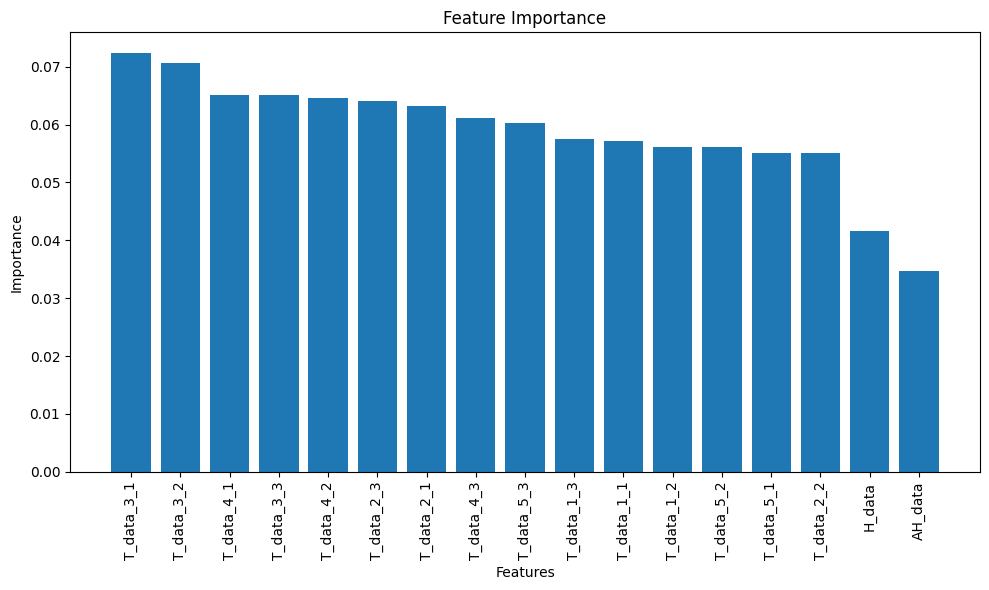

In [63]:
import matplotlib.pyplot as plt

# Get feature importances from the trained Random Forest model
importances = random_forest.feature_importances_

# Get the names of the features
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names based on feature importances
sorted_feature_names = [feature_names[i] for i in indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), sorted_feature_names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


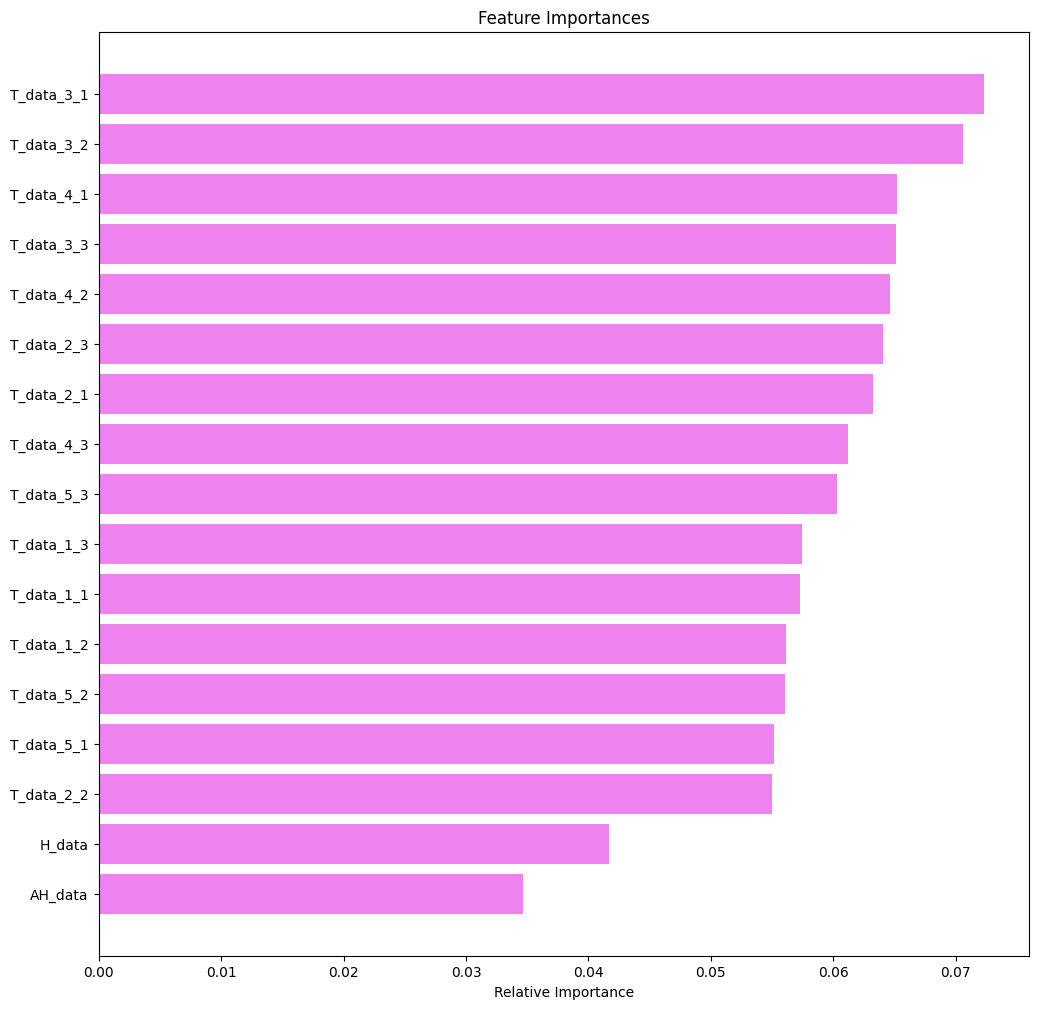

In [64]:
feature_names = X.columns
importances = random_forest.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Building a Pipeline For the FInal Model

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import KNNImputer

# Define the pipeline
pipeline = Pipeline([
    ('imputer', KNNImputer(n_neighbors=5)),  # KNN imputation
    ('random_forest', RandomForestRegressor(max_depth=None, max_features='log2',
                                      n_estimators=120))  # Random Forest model
])

# Train the model using the pipeline
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
test_rmse = mean_squared_error(y_test, y_pred, squared=False)
test_mae = mean_absolute_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Test RMSE:", test_rmse)
print("Test MAE:", test_mae)
print("Test R^2 Score:", test_r2)


Test RMSE: 5.254172810469552
Test MAE: 3.8589296950975345
Test R^2 Score: 0.8997628749493112
